# Exercise 12-1: Another analysis of the Polling data - Solution

## Get the data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
filename = '../../data/president_polls_2016.csv'
polls = pd.read_csv(filename)

In [3]:
polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

## Clean the data

In [4]:
polls = polls[['enddate','grade','rawpoll_clinton','rawpoll_trump','state']]

In [5]:
polls.dropna(inplace=True)

In [6]:
polls['type'] = polls.apply(lambda x: 'national' if x.state =='U.S.' else 'state', axis=1)

In [7]:
polls.drop(columns='state', inplace=True)

In [8]:
polls.enddate = pd.to_datetime(polls.enddate)

In [9]:
polls = polls.query('type == "national"')

In [10]:
polls.head()

,enddate,grade,rawpoll_clinton,rawpoll_trump,type
0,2016-11-06,A+,47.00,43.00,national
1,2016-11-07,B,38.03,35.69,national
2,2016-11-06,A-,42.00,39.00,national
3,2016-11-07,B,45.00,41.00,national
4,2016-11-06,B-,47.00,43.00,national


## Prepare and analyze the data

In [11]:
polls.grade.value_counts()

A-    1215
C+     546
B      162
C-     126
A+     114
B+     105
B-      96
A       87
C        3
Name: grade, dtype: int64

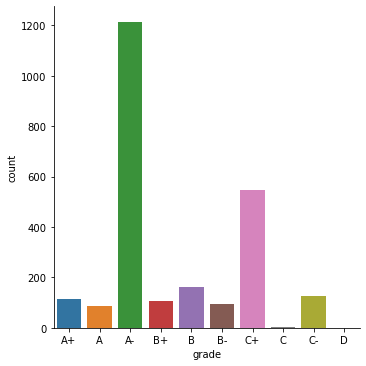

In [12]:
sns.catplot(data=polls, x='grade', kind='count', 
            order=['A+','A','A-','B+','B','B-','C+','C','C-','D'])

In [13]:
polls['grade_letter'] = polls.apply(
    lambda x: 'A' if 'A' in x.grade else (
              'B' if 'B' in x.grade else (
              'C' if 'C' in x.grade else 'D')), axis=1)

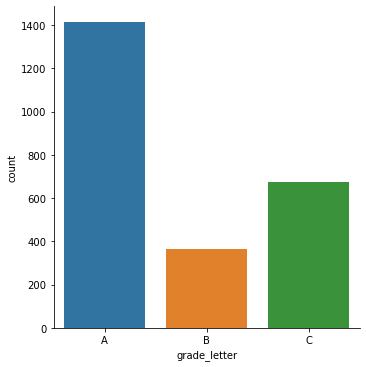

In [14]:
sns.catplot(data=polls, x='grade_letter', kind='count')

In [15]:
pollsMelt = polls.melt(id_vars=['enddate','grade','grade_letter','type'], 
                       value_vars=['rawpoll_clinton','rawpoll_trump'], 
                       var_name='candidate', value_name='percent')

In [16]:
pollsMelt.candidate = pollsMelt.apply(
    lambda x: 'Clinton' if x.candidate == 'rawpoll_clinton' else 'Trump', axis=1)

In [17]:
pollsMelt.head()

,enddate,grade,grade_letter,type,candidate,percent
0,2016-11-06,A+,A,national,Clinton,47.00
1,2016-11-07,B,B,national,Clinton,38.03
2,2016-11-06,A-,A,national,Clinton,42.00
3,2016-11-07,B,B,national,Clinton,45.00
4,2016-11-06,B-,B,national,Clinton,47.00


## Plot the data

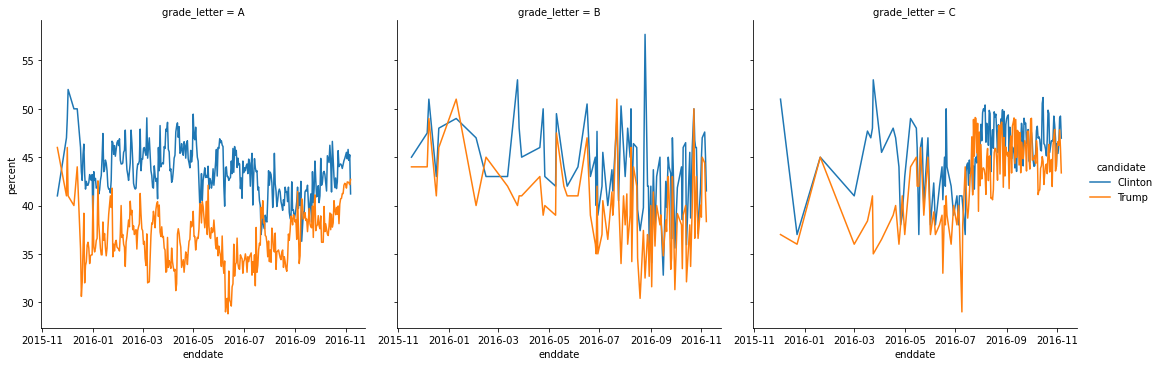

In [18]:
sns.relplot(data=pollsMelt, kind='line', ci=None,
            x='enddate', y='percent', hue='candidate', 
            col='grade_letter')

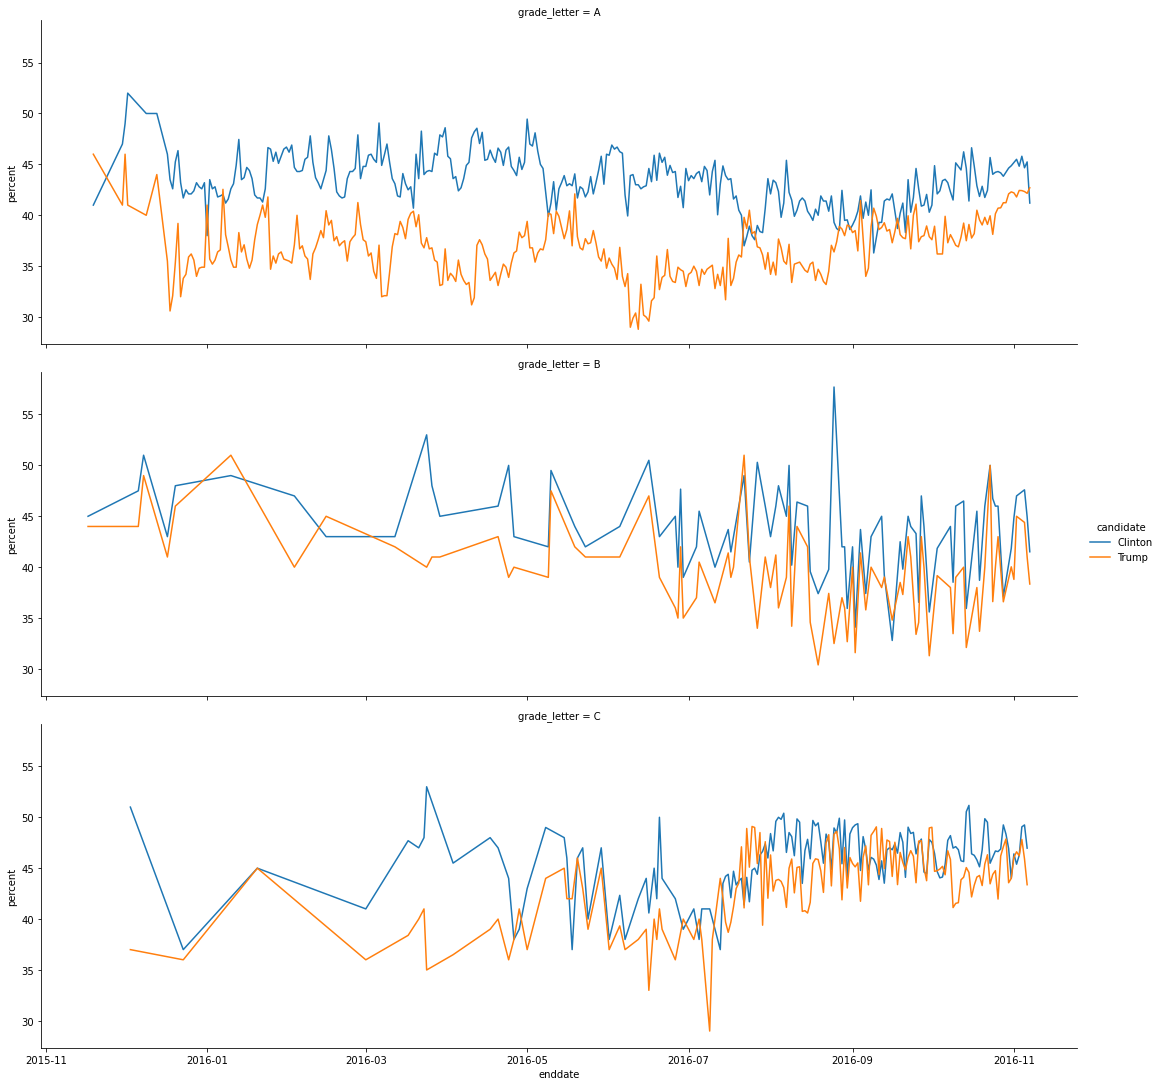

In [19]:
sns.relplot(data=pollsMelt, kind='line', ci=None,
            x='enddate', y='percent', hue='candidate', 
            col='grade_letter',  col_wrap=1, aspect=3)

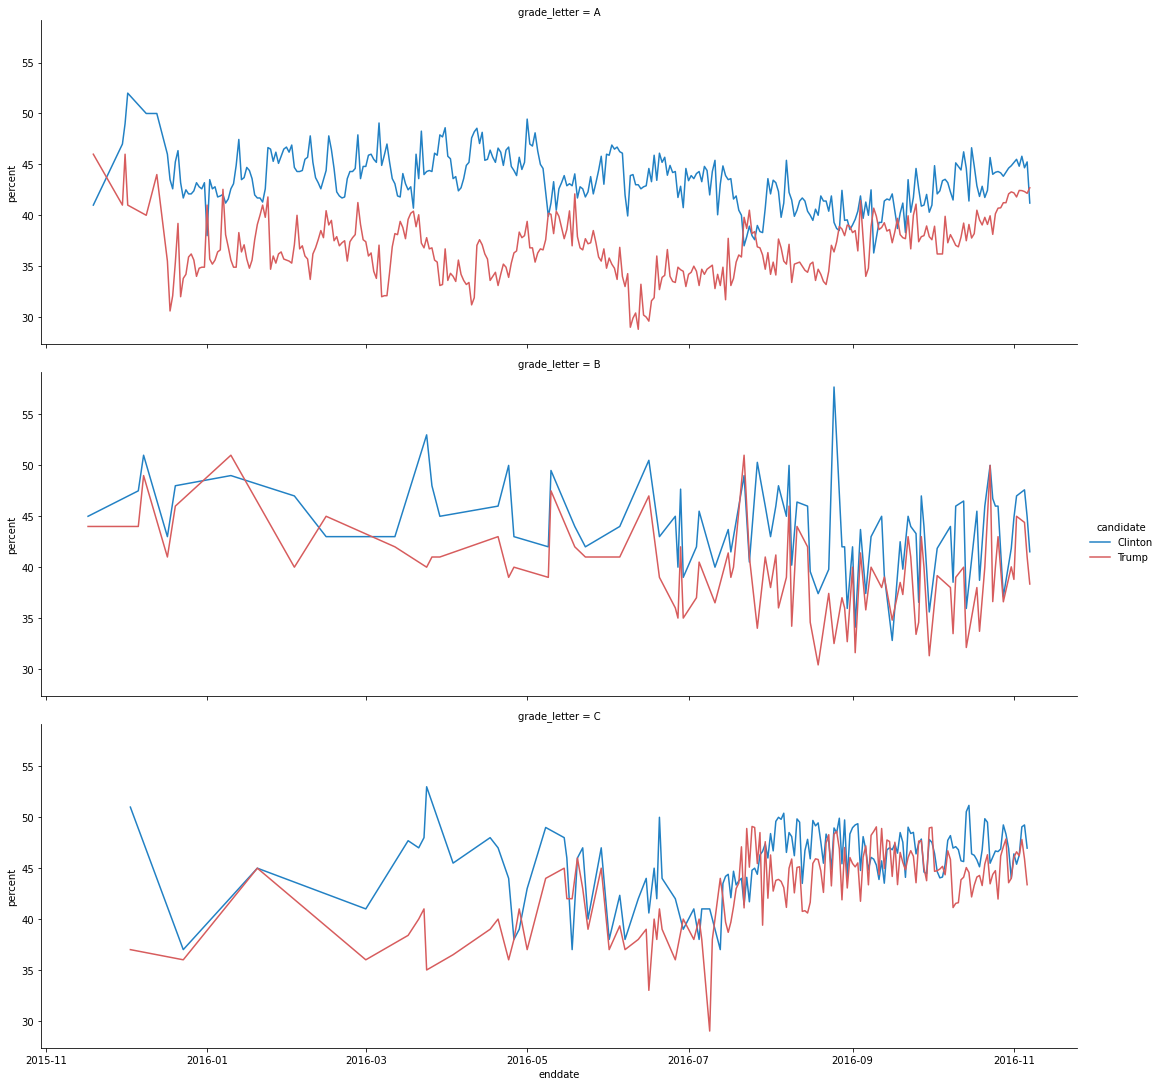

In [20]:
colors = ['#2281c4','#d75c5d']
sns.set_palette(sns.color_palette(colors))

sns.relplot(data=pollsMelt, kind='line', ci=None,
            x='enddate', y='percent', hue='candidate', 
            col='grade_letter', col_wrap=1, aspect=3)